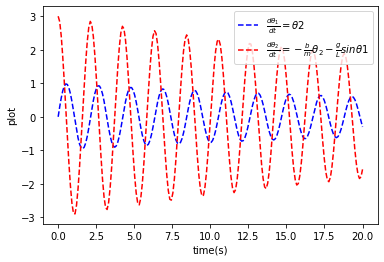

/Users/elliott/ej3517/GitHub/FYP_Proprioceptive_Robot_Hand/venv/lib/python3.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


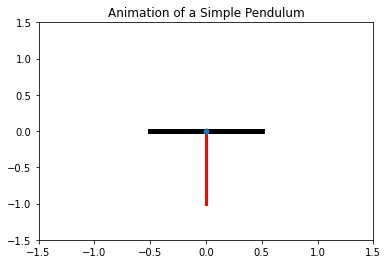

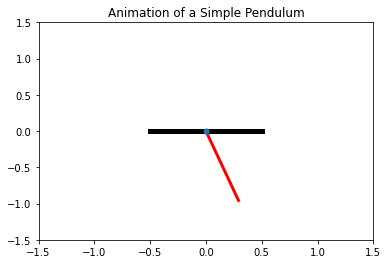

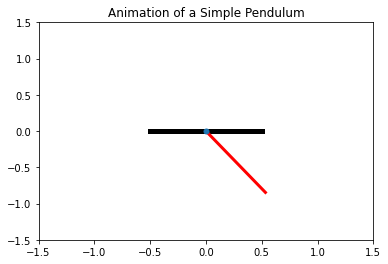

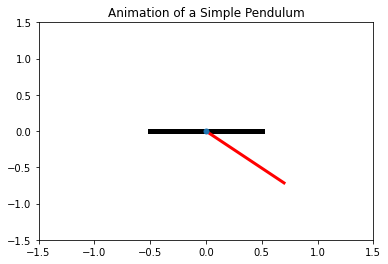

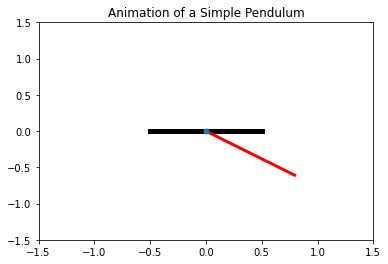

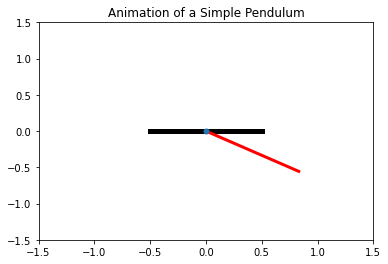

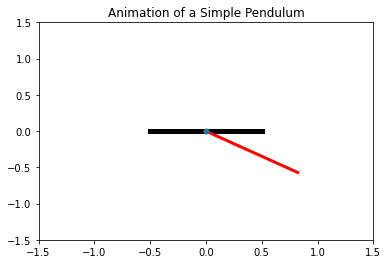

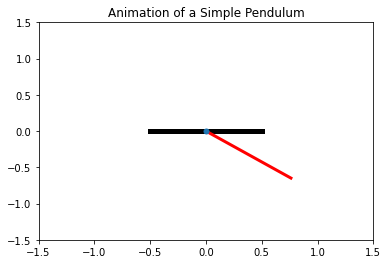

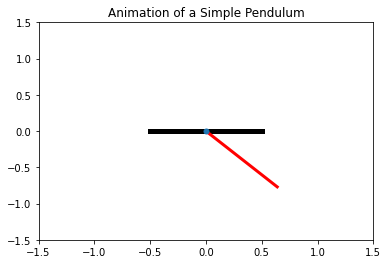

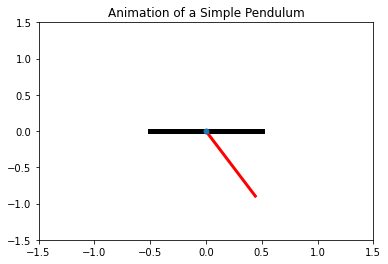

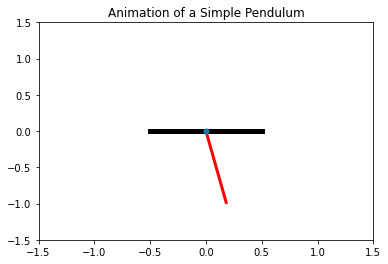

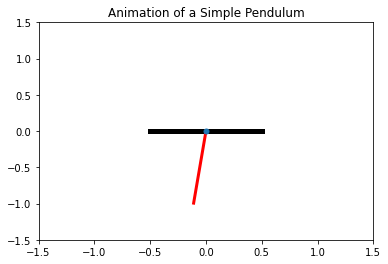

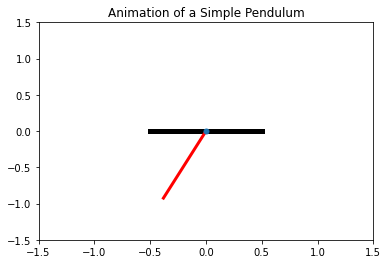

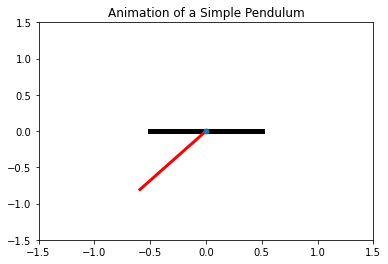

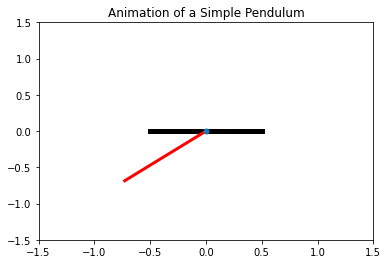

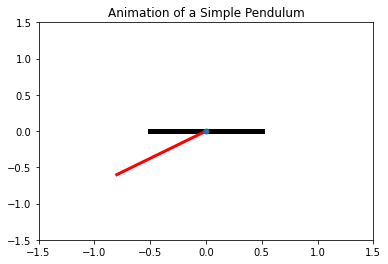

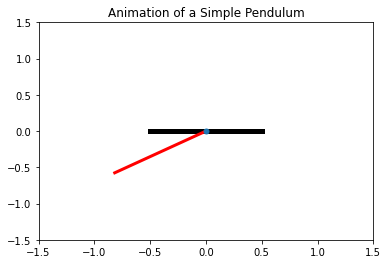

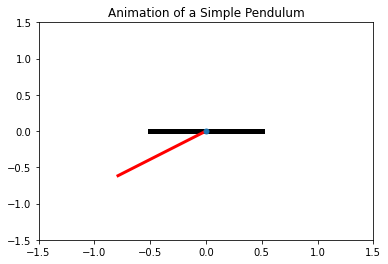

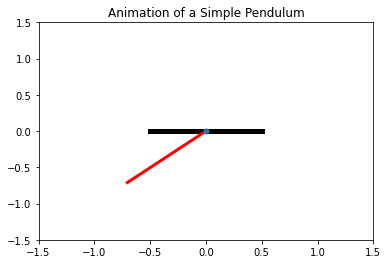

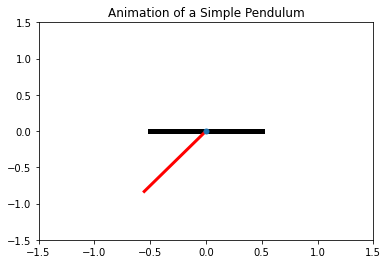

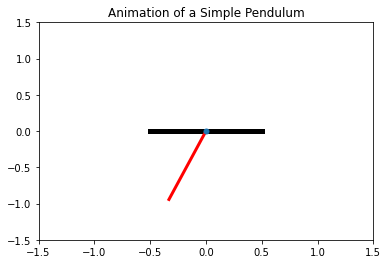

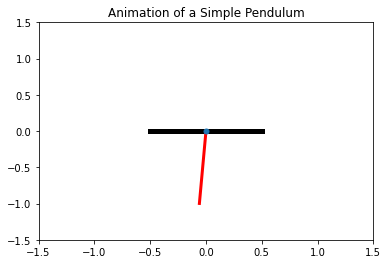

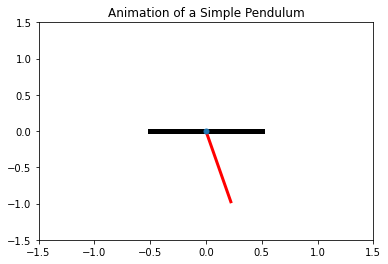

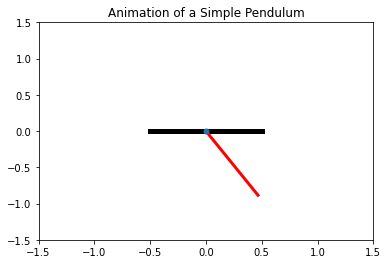

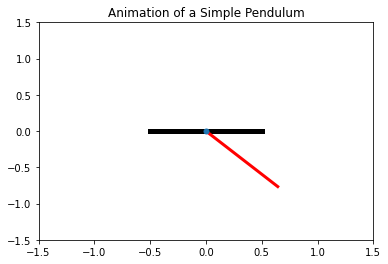

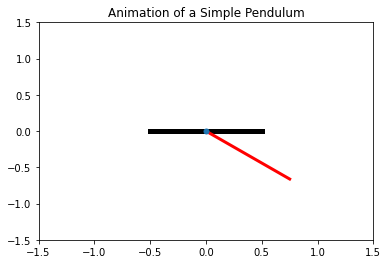

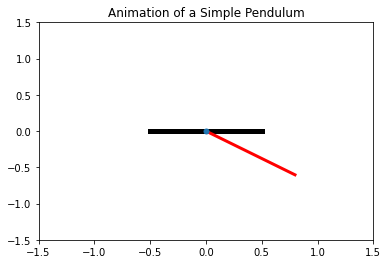

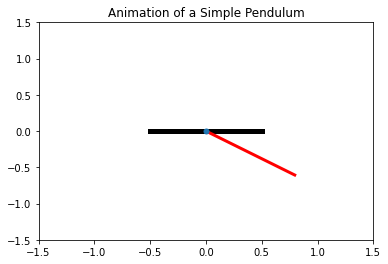

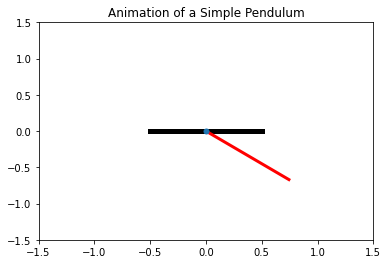

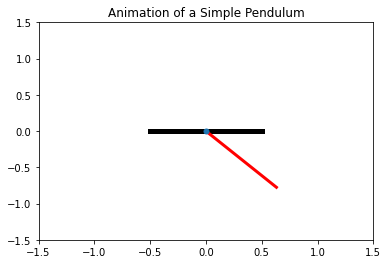

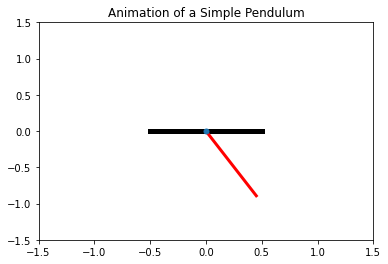

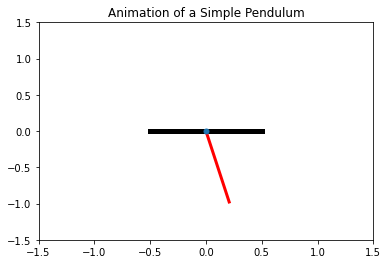

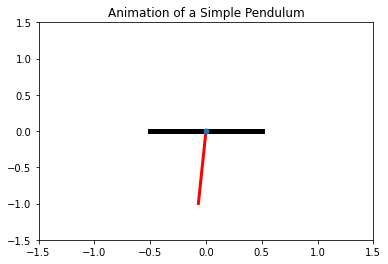

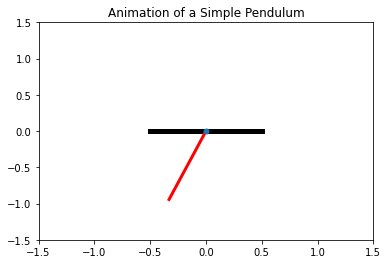

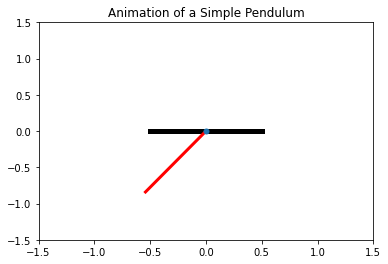

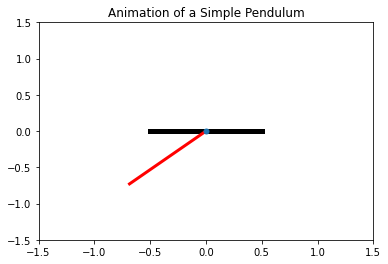

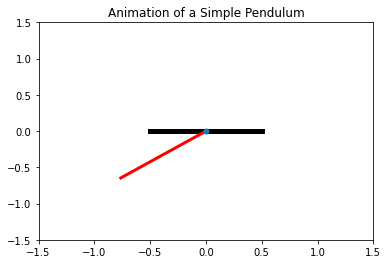

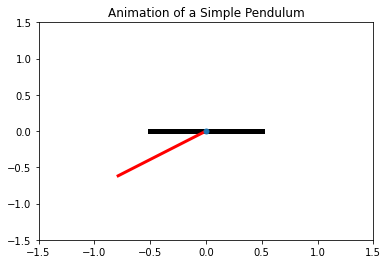

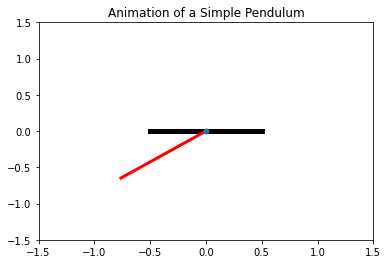

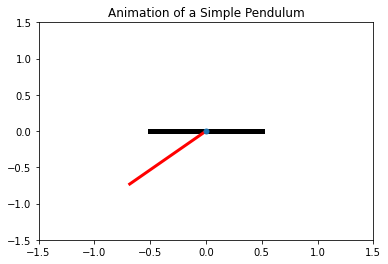

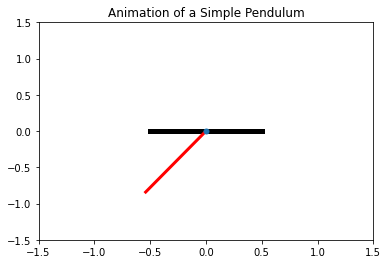

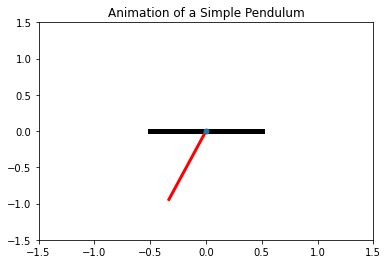

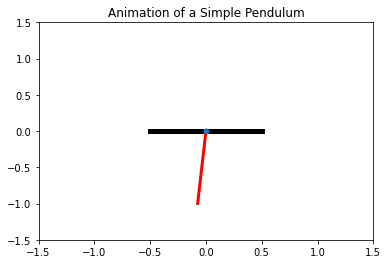

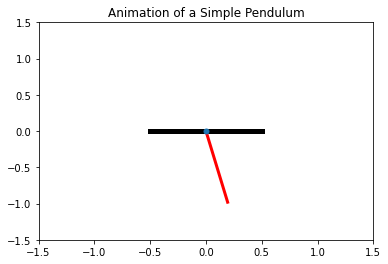

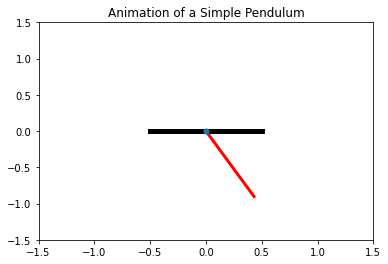

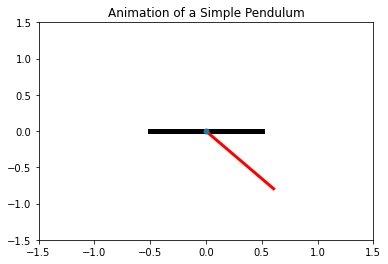

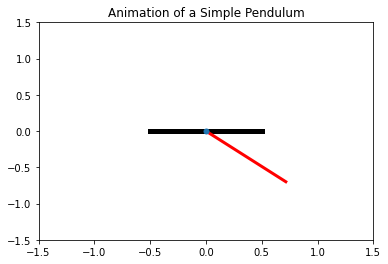

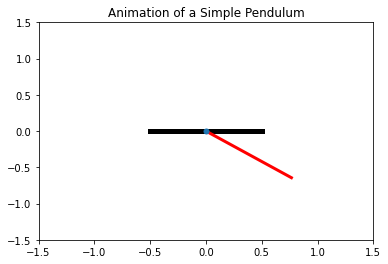

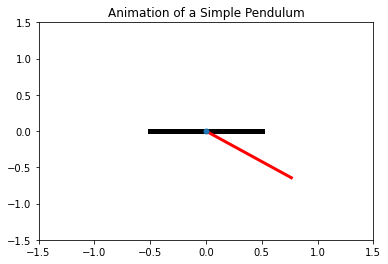

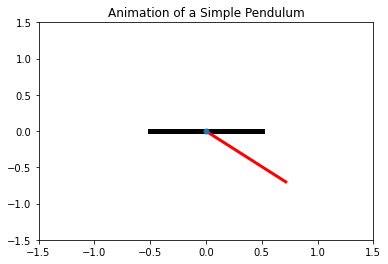

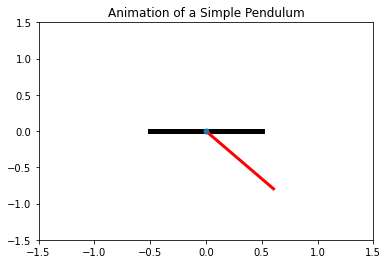

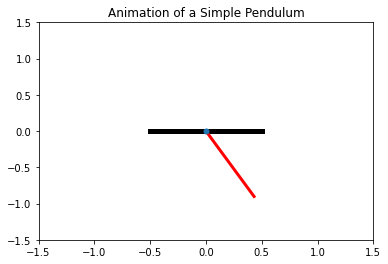

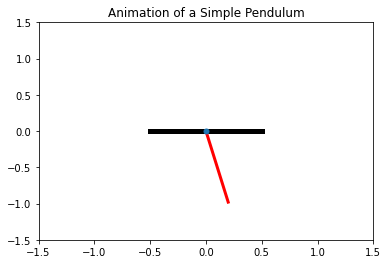

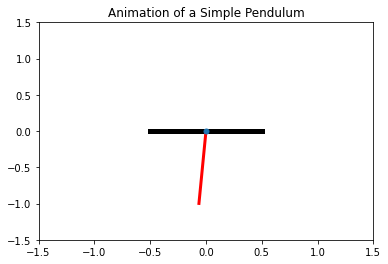

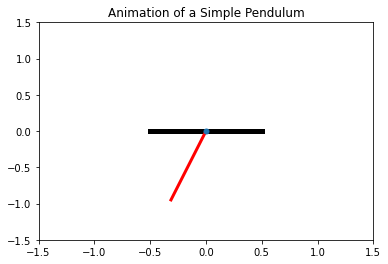

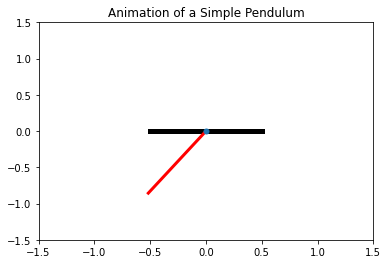

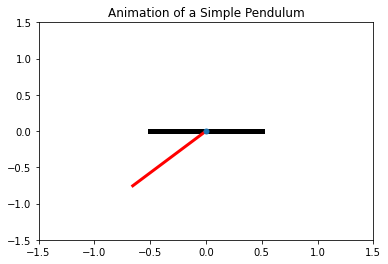

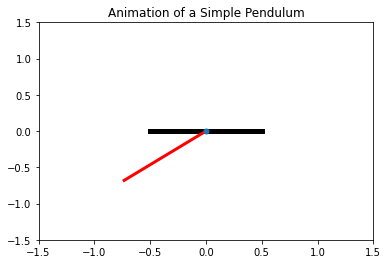

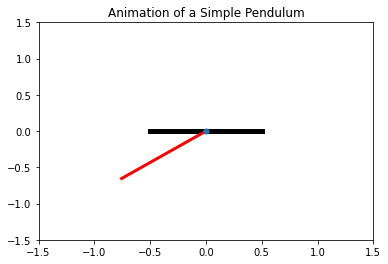

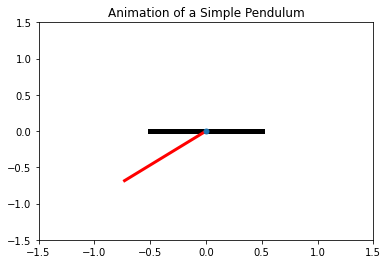

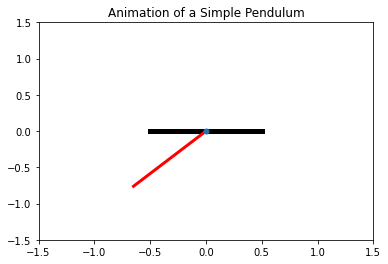

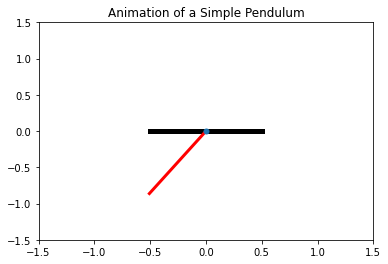

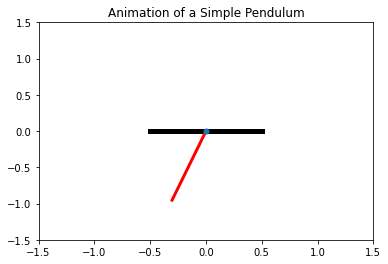

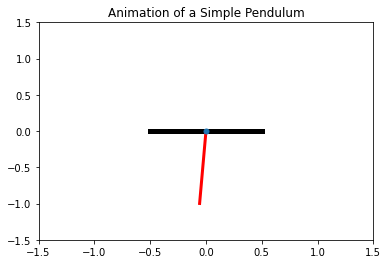

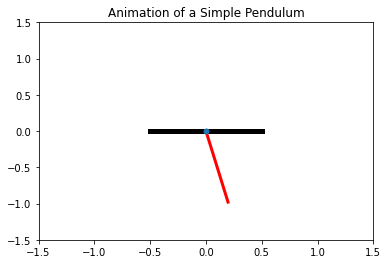

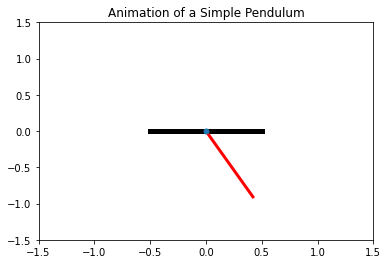

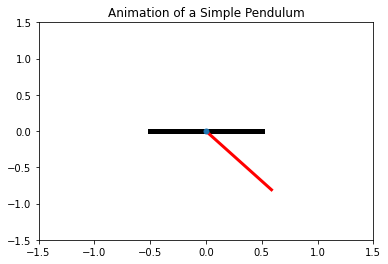

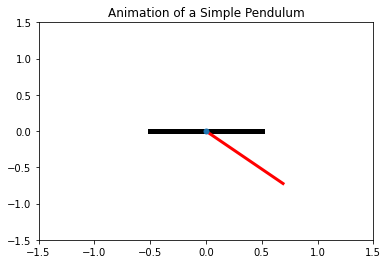

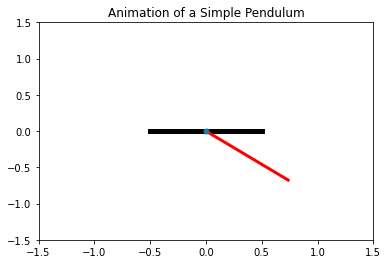

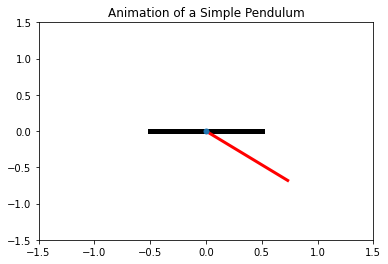

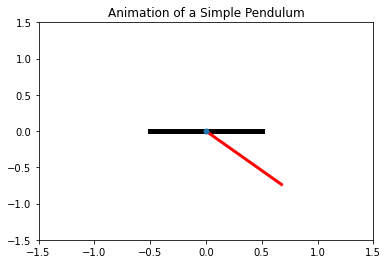

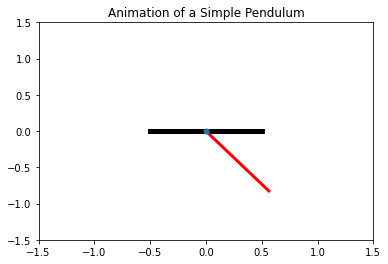

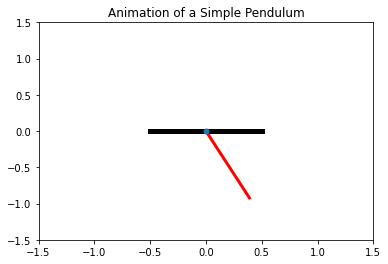

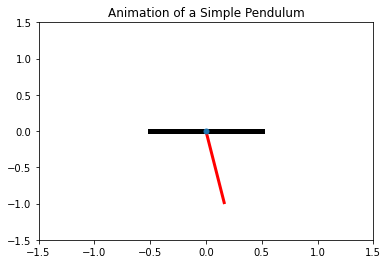

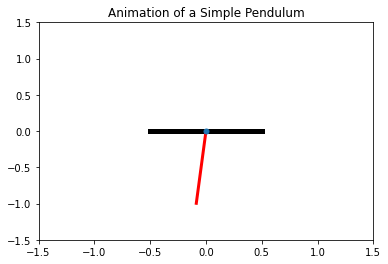

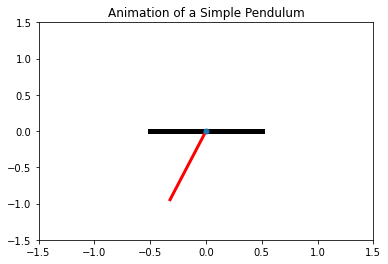

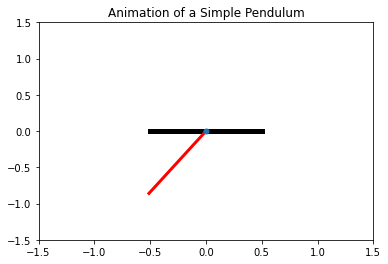

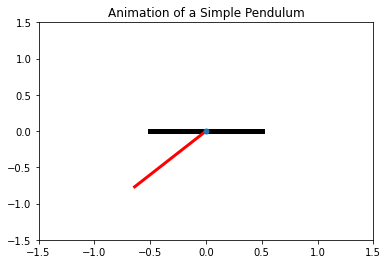

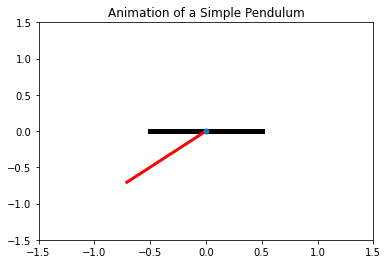

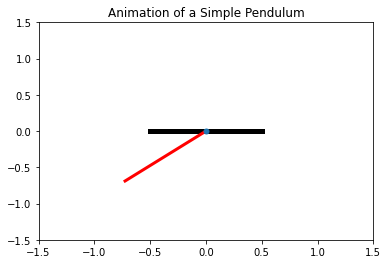

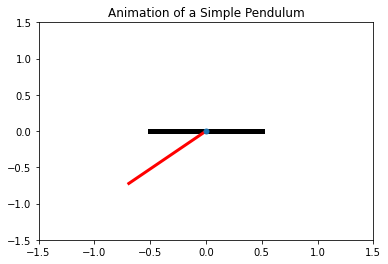

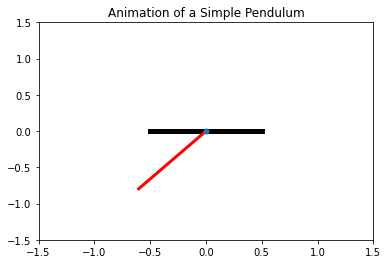

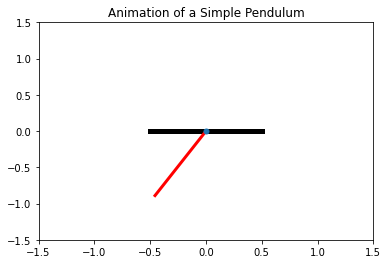

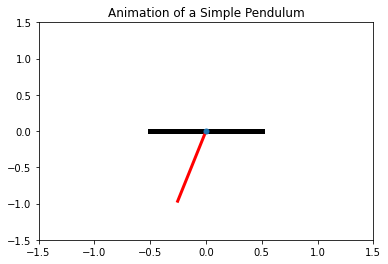

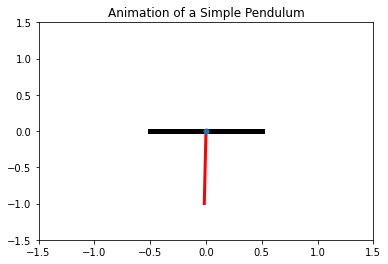

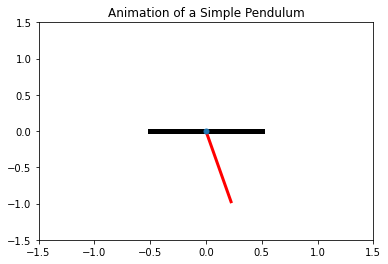

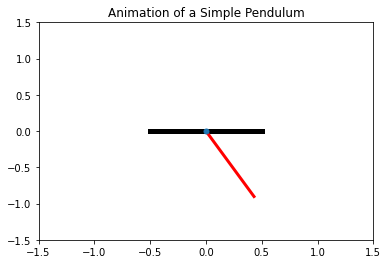

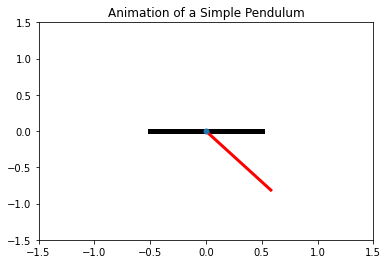

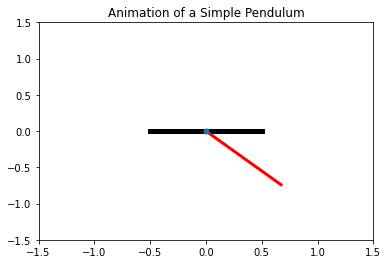

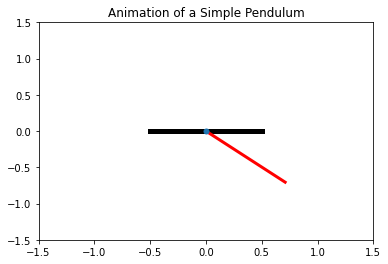

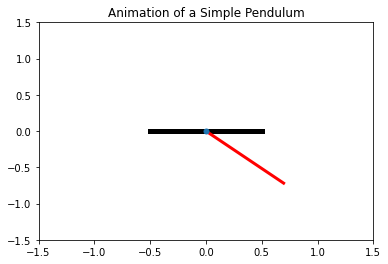

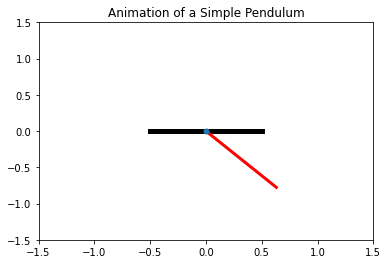

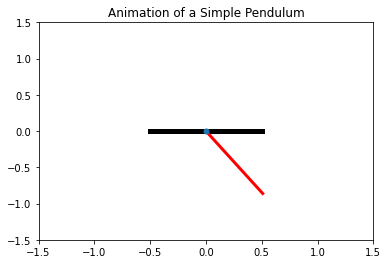

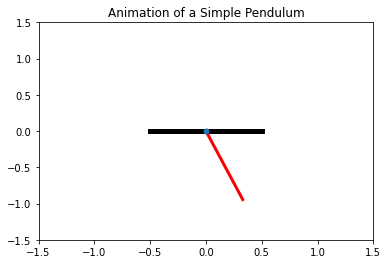

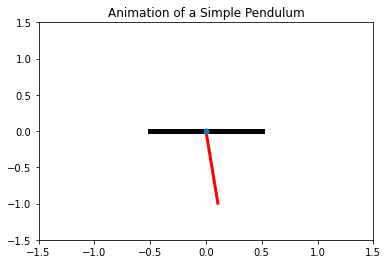

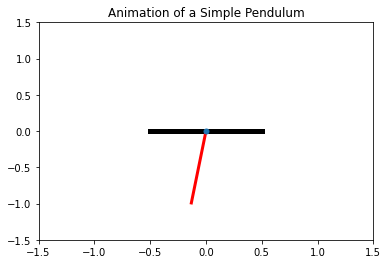

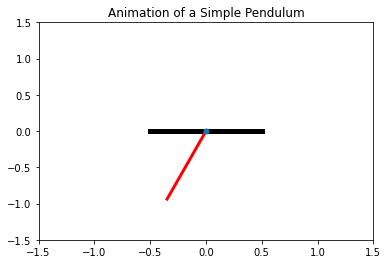

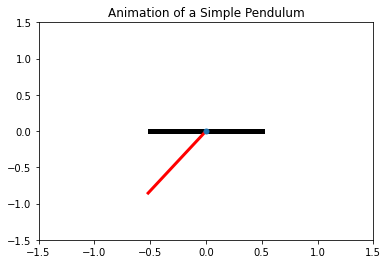

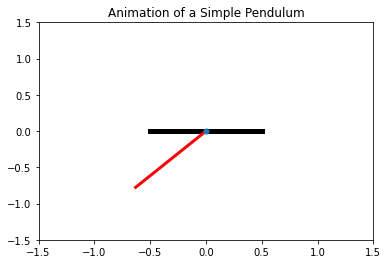

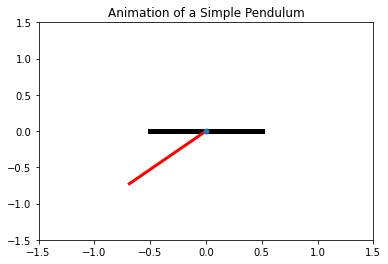

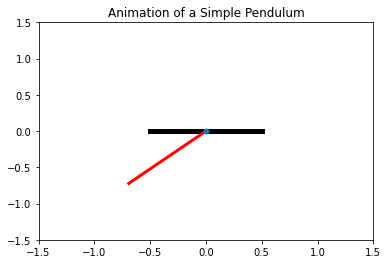

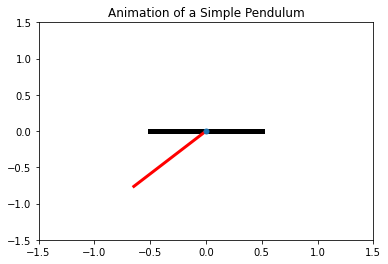

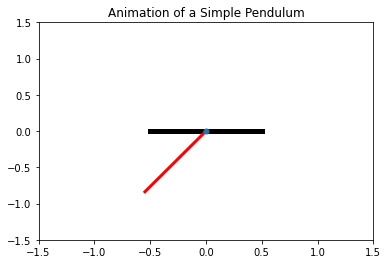

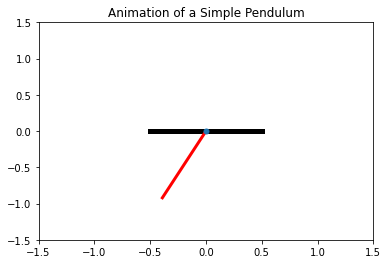

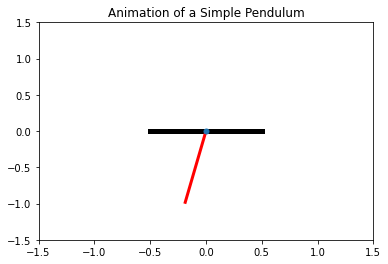

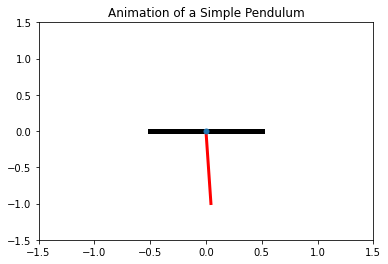

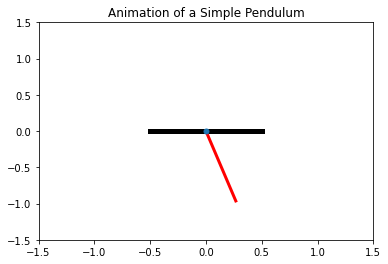

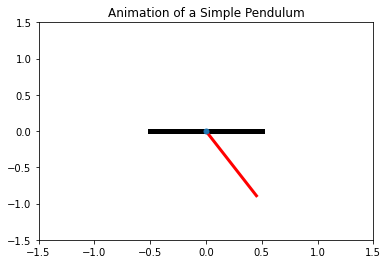

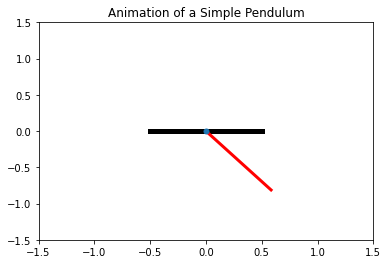

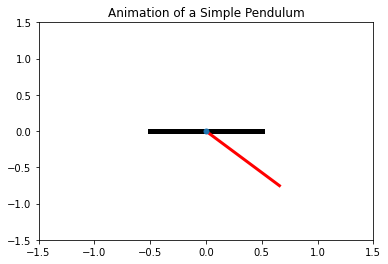

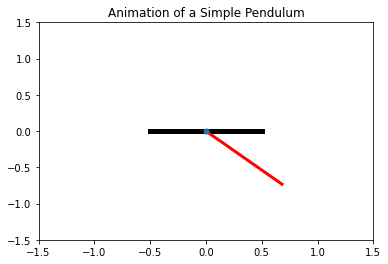

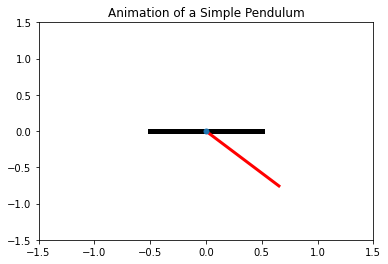

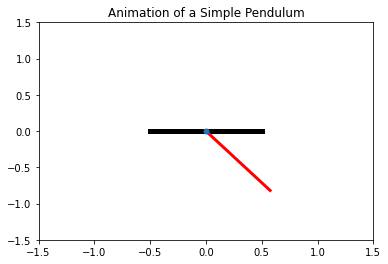

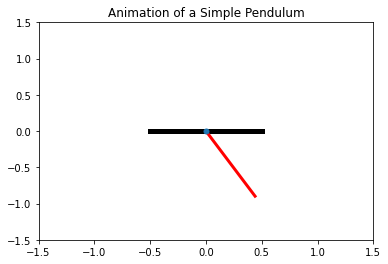

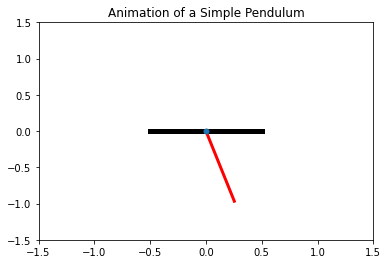

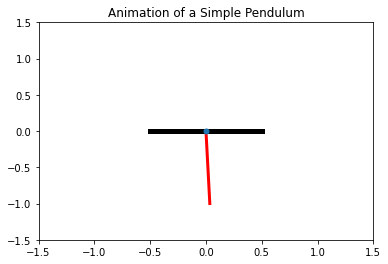

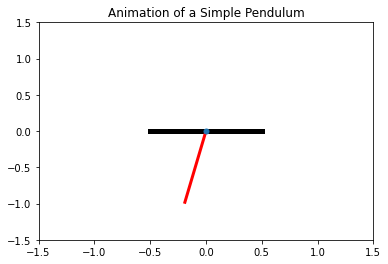

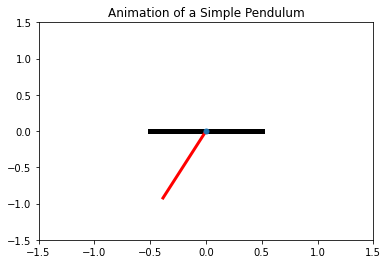

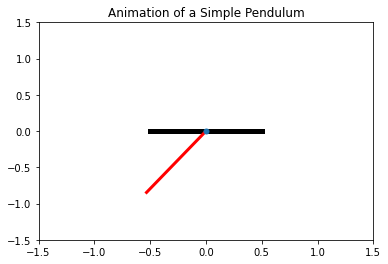

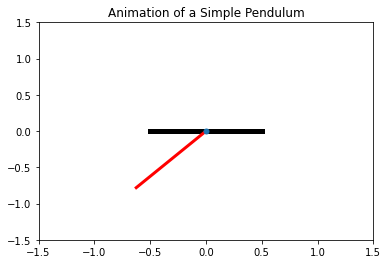

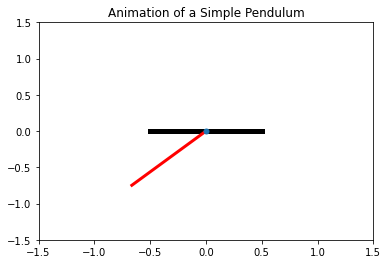

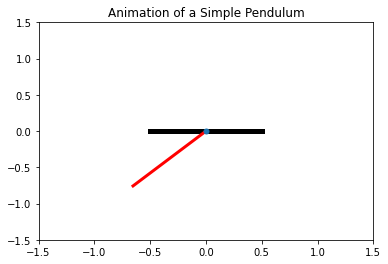

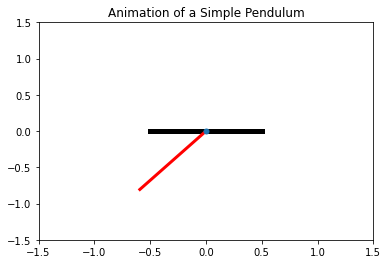

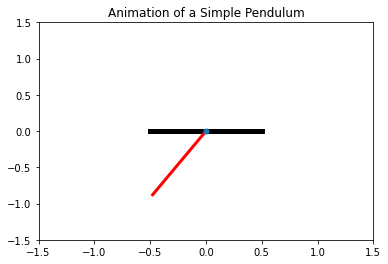

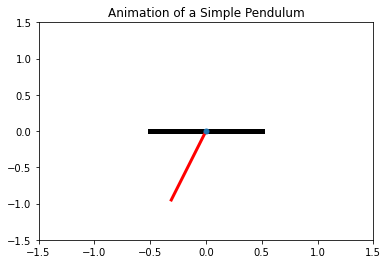

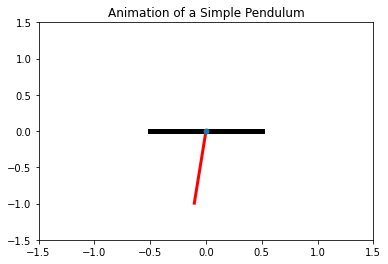

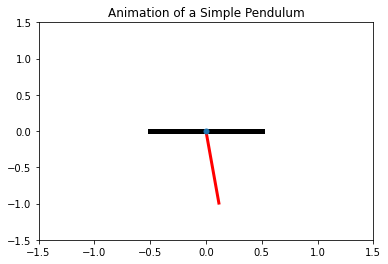

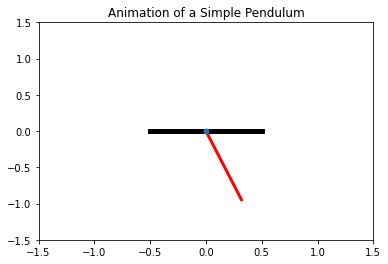

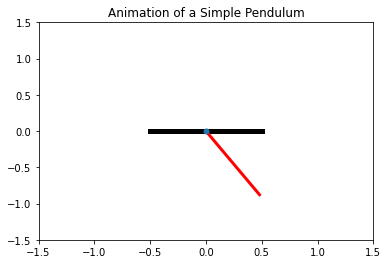

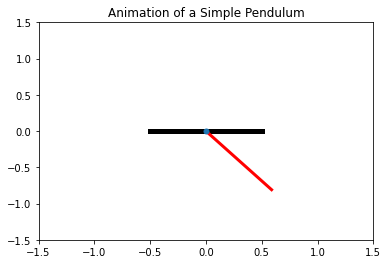

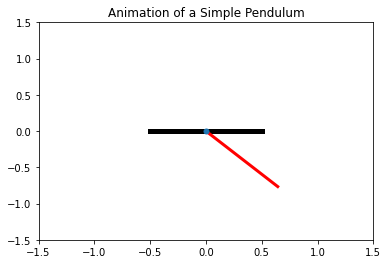

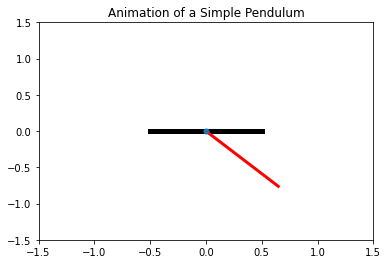

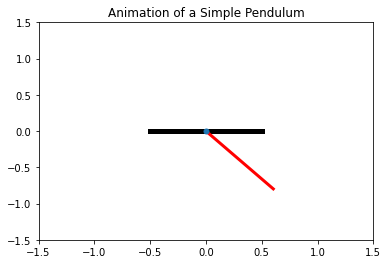

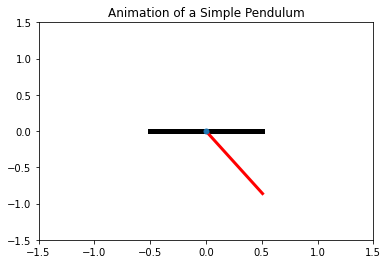

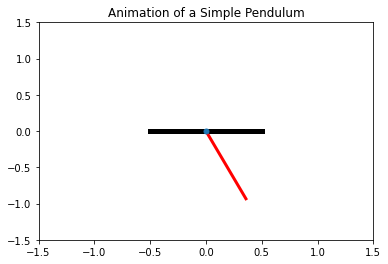

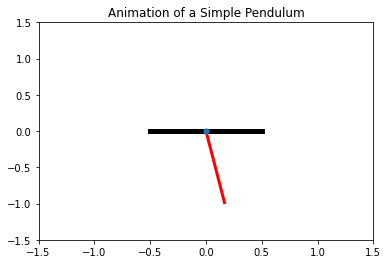

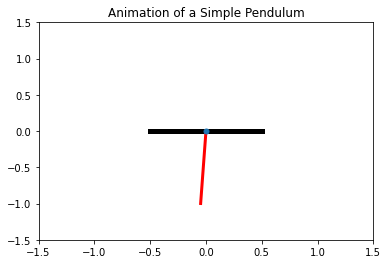

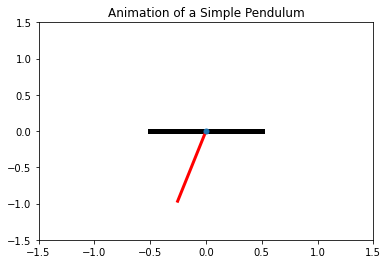

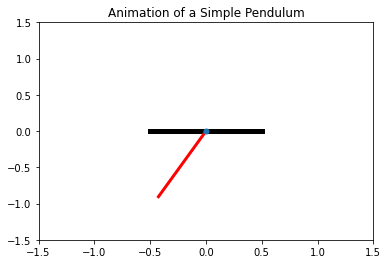

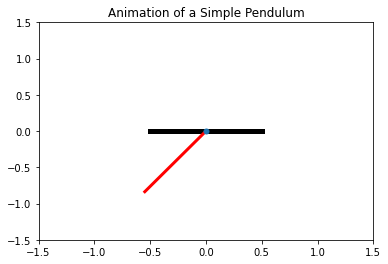

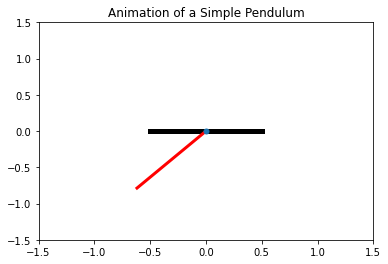

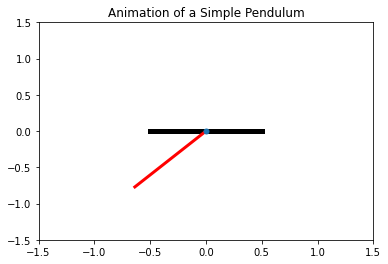

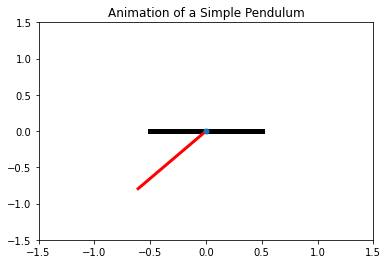

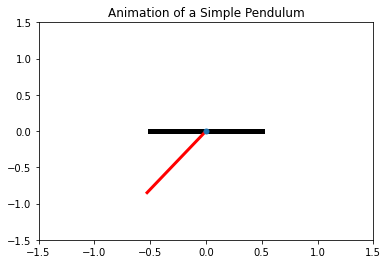

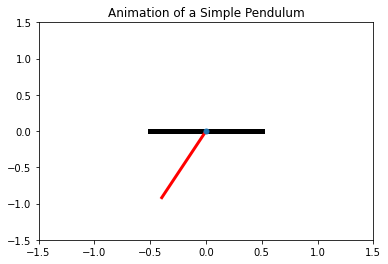

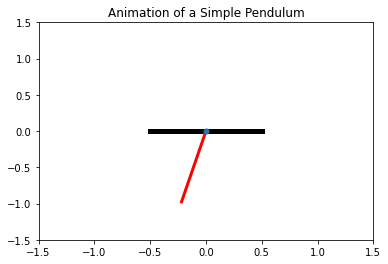

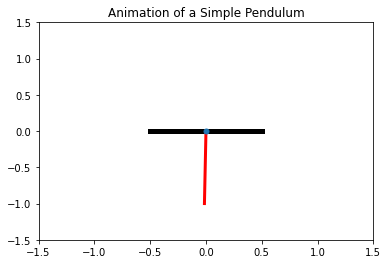

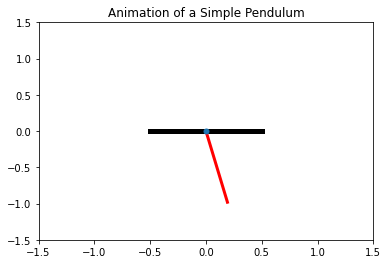

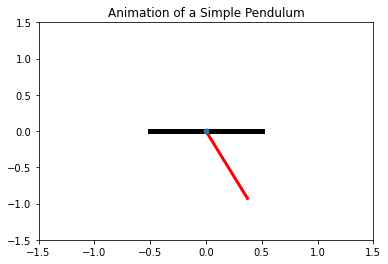

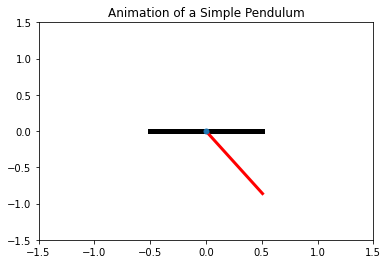

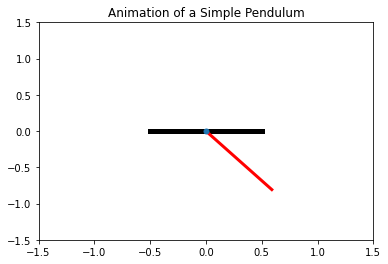

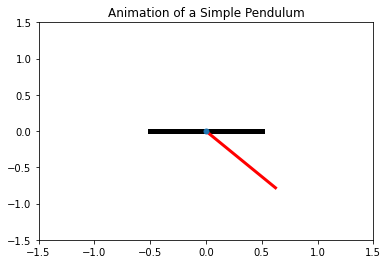

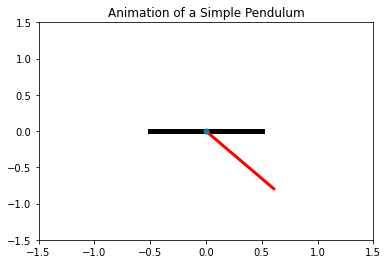

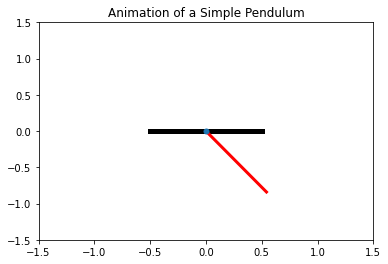

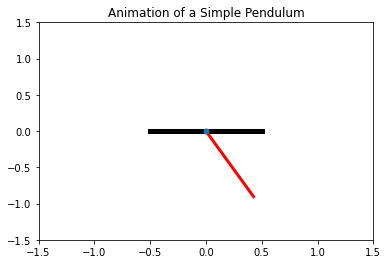

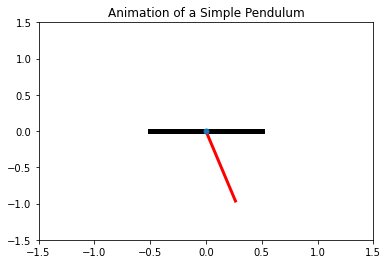

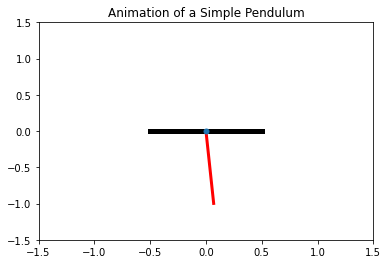

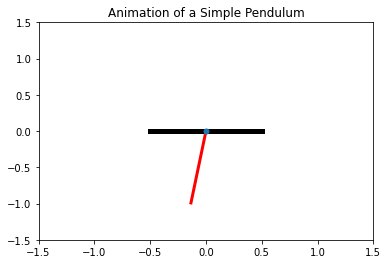

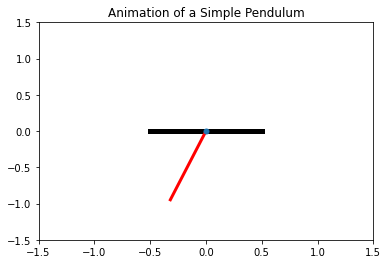

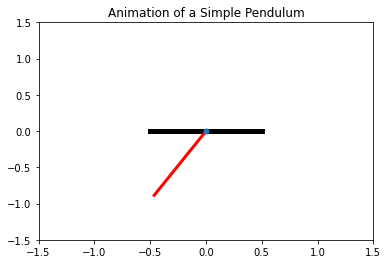

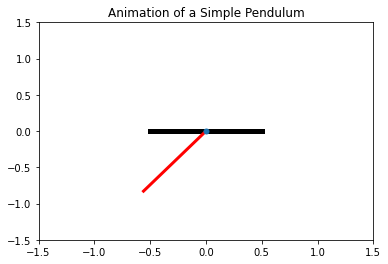

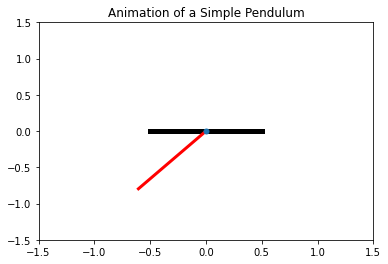

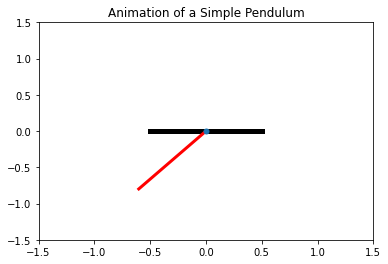

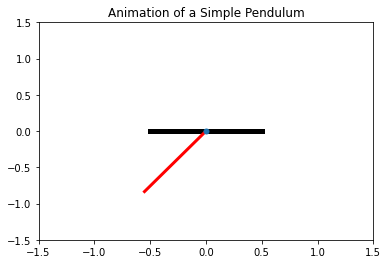

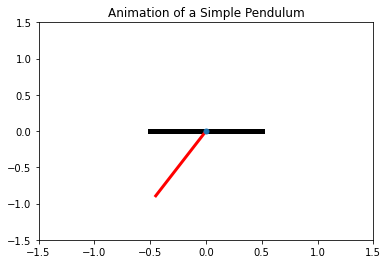

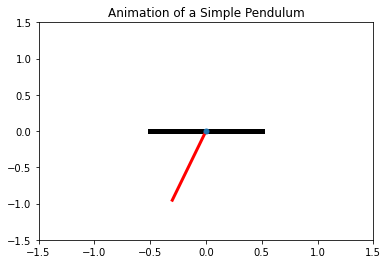

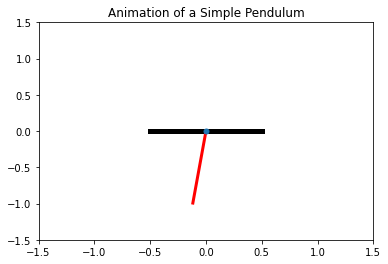

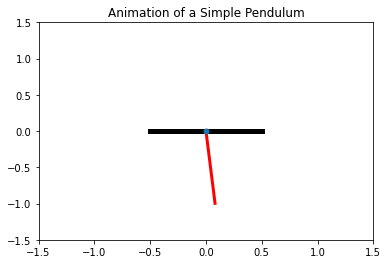

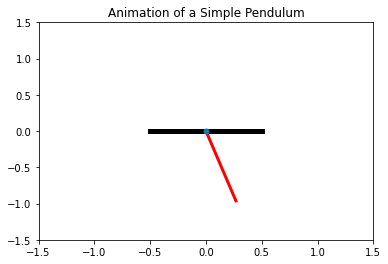

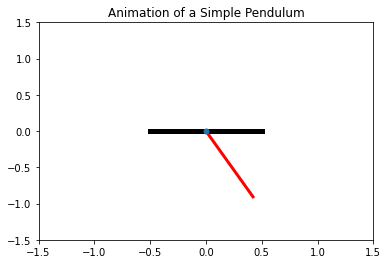

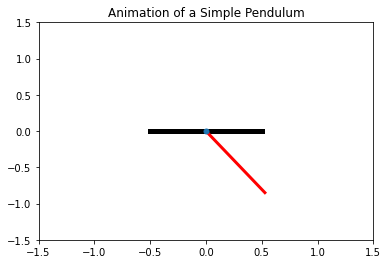

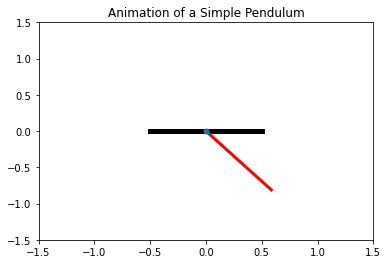

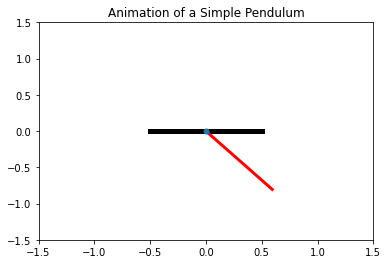

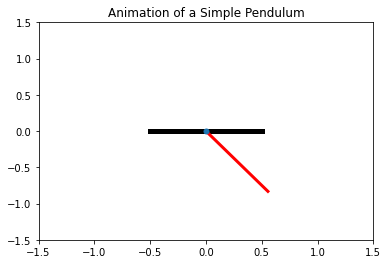

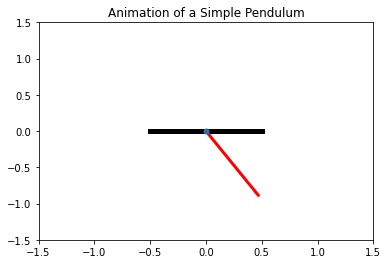

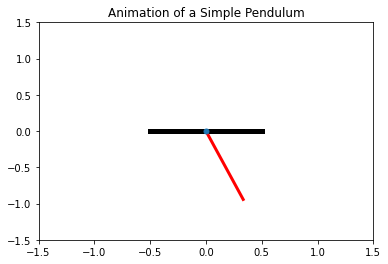

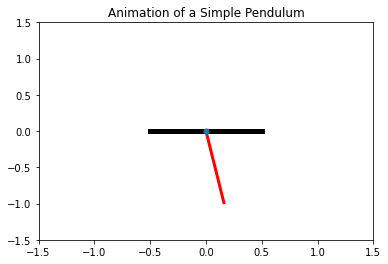

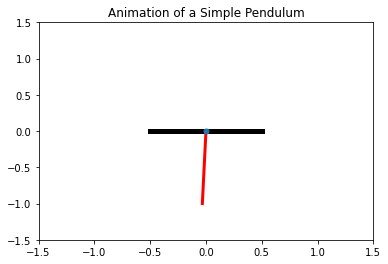

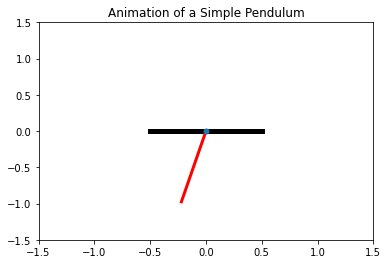

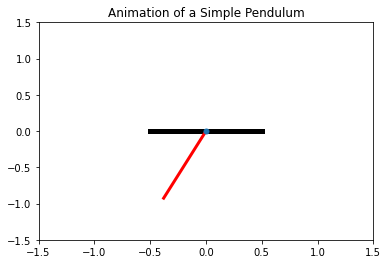

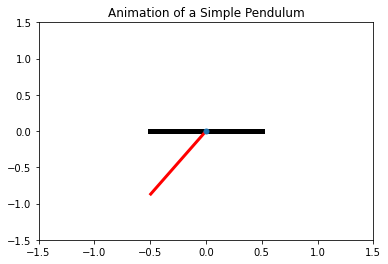

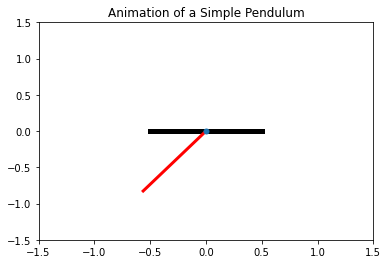

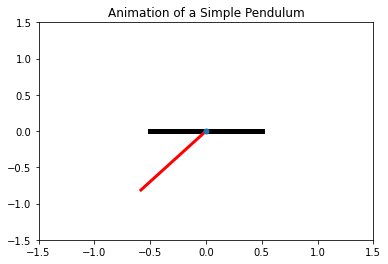

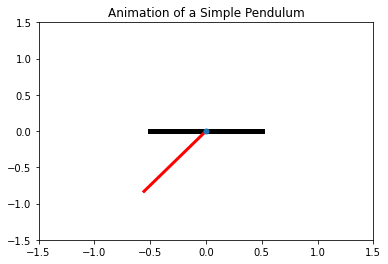

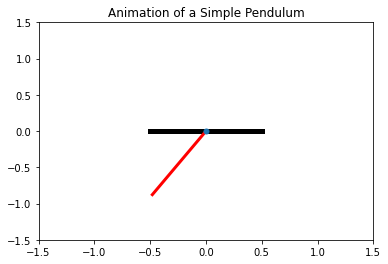

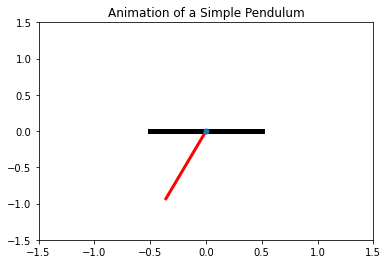

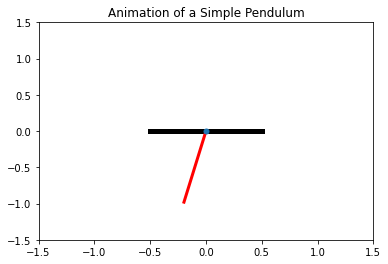

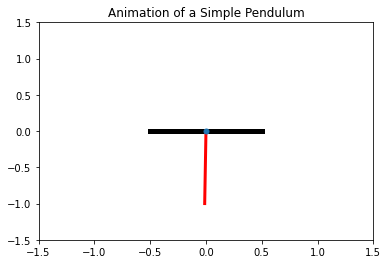

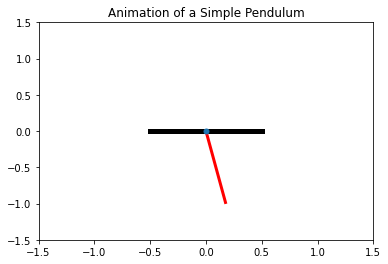

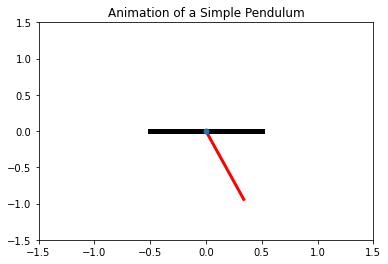

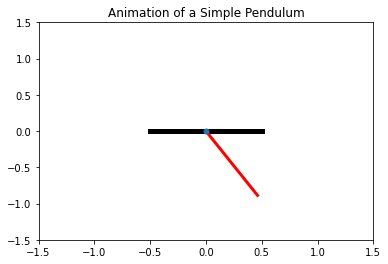

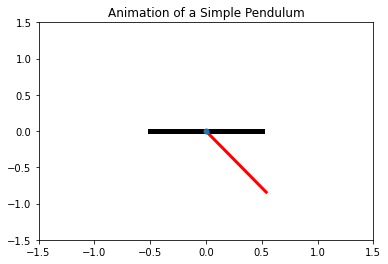

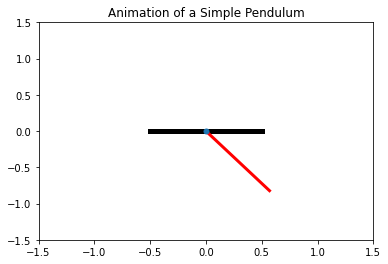

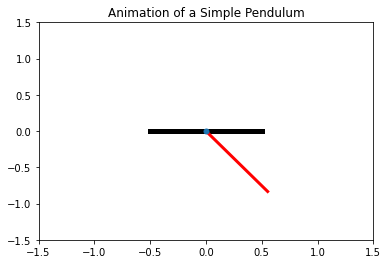

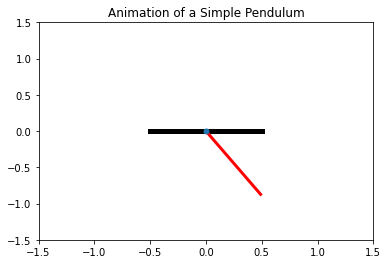

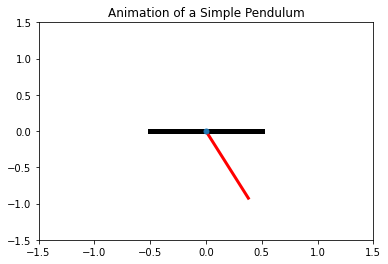

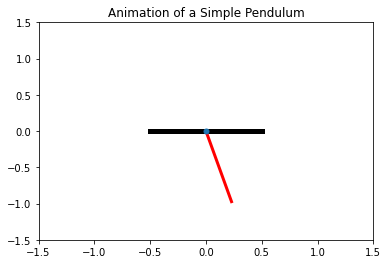

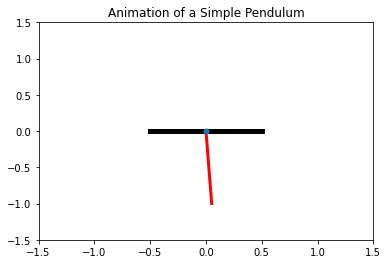

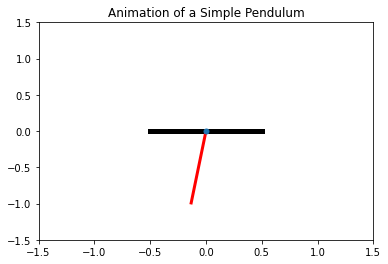

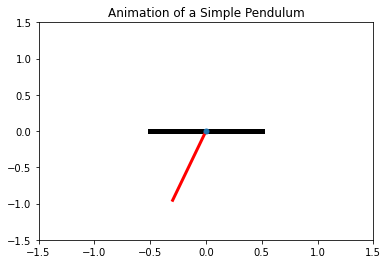

In [9]:
import numpy as np
from scipy.integrate import odeint
import math
import matplotlib.pyplot as plt
"""
damping: effects that reduce the amplitude of the vibration
"""

def ode_func(theta,t,b,g,l,m):
    
    theta1=theta[0]
    theta2=theta[1]
    #first ode
    dtheta1_dt = theta2
    #second ode
    dtheta2_dt =-((b/m)*(theta2))-((g/l)*math.sin(theta1));
    dtheta_dt = [dtheta1_dt, dtheta2_dt]
    return dtheta_dt

b=0.05
g=9.81
l=1
m=1

#initial conditions
theta_0=[0,3]
# time plot
t = np.linspace(0,20,200)
#T = len(t)
# solving the ode
theta = odeint(ode_func,theta_0,t,args=(b,g,l,m))
plt.figure(1)
plt.plot(t,theta[:,0],'b--',label=r'$\frac{d\theta_1}{dt}=\theta2$')
plt.plot(t,theta[:,1],'r--',label=r'$\frac{d\theta_2}{dt}=-\frac{b}{m}\theta_2-\frac{g}{L}sin\theta1$')
plt.xlabel('time(s)')
plt.ylabel('plot')
plt.legend(loc='best')
plt.show()

ite = 1
# Create a loop for the animation
for t in theta[:,0]:
    x0=0
    y0=0
    x1=(l*math.sin(t))
    y1 = -(l*math.cos(t))
    filename = str(ite)+'.png'
    ite+=1
    
    #plotting
    plt.figure()
    plt.plot([-0.5,0.5],[0,0],'black',linewidth=5)
    plt.plot([x0,x1],[y0,y1],linewidth=3,color='r')
    plt.plot(x0,y0,'o',markersize=5)
    plt.plot(x1,y1,markersize=30,color='blue')
    plt.xlim([-1.5,1.5])
    plt.ylim([-1.5,1.5])
    plt.title('Animation of a Simple Pendulum')
    plt.savefig(filename)
    
